# Доверительные интервалы

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Задание № 0

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого


In [5]:
from math import sqrt
delta = 3
sigma = 225
z = 1.96

In [7]:
N = round(((z * sqrt(sigma)) / delta)**2)
N

96


### Задание № 1

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого


In [10]:
n = 25
x = 130
std = 15
beta = 0.98
z = 2.576

In [12]:
delta = (std / sqrt(n)) * z
print(x - delta, ';', x, ';', x + delta)

122.272 ; 130 ; 137.728



### Задание № 2

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально


In [109]:
np.random.seed(1)

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)

In [110]:
t, p_value = stats.ttest_ind(population_men, population_women)
t, p_value

(2.1992132837425915, 0.027862780940935528)

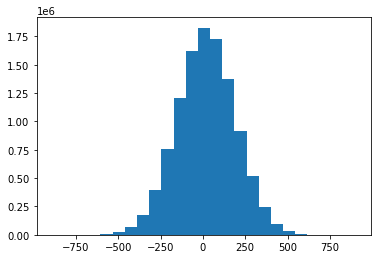

In [113]:
plt.hist(population_men, bins = 25);
plt.hist(population_women, bins = 25);

Т.к 0.027 > 0.001 то можно сделать вывод, что выборки не отличаются => эффект случайный. На гистограмме не видно второй график, т.к кол-во значений в выборках не сопоставимы.

Если увеличить кол-во значений в выборке population_women, то

In [117]:
population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  
population_women = stats.norm.rvs(loc=16, scale=165, size=1200000)

In [118]:
t, p_value = stats.ttest_ind(population_men, population_women)
t, p_value

(17.625673710894876, 1.5680512307915696e-69)

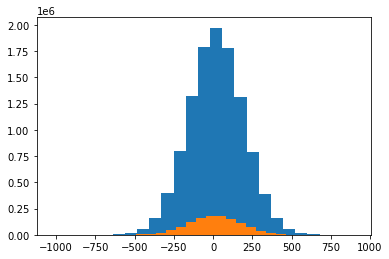

In [120]:
plt.hist(population_men, bins = 25);
plt.hist(population_women, bins = 25);

На основе новых рассчитанных значений можно сделать вывод, что эффект не случаен.


### Задание № 3

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.


In [121]:
std = 150
beta = 0.95
z = 1.96
delta = 50

In [124]:
N = ((std * z) / delta) ** 2
round(N)

35


### Задание № 4

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).


In [125]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [129]:
import scipy.stats
oddsratio, pvalue = scipy.stats.fisher_exact(observations)
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

Т.к 0.35 > 0.05, то можно сделать вывод, что маг не обладаем даром предсказывания погоды


### Задание № 5

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:



In [136]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]


In [131]:
def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [132]:
mean_confidence_interval(data, 0.9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)


### Задание № 6

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.


In [137]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [139]:
t, p_value = stats.ttest_ind(data_1, data_2)
t, p_value

(7.35744682757447, 2.1159475572725764e-11)

(array([ 3.,  6.,  8., 18.,  0., 23., 19.,  9.,  4.,  3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

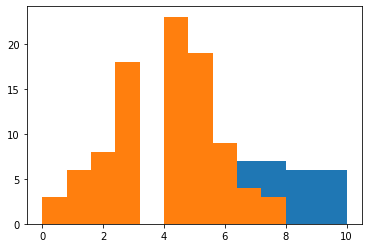

In [150]:
plt.hist(data_1)
plt.hist(data_2)

Т.к рассчитанное значение меньше 0.05, то мы делаем вывод, что выборки отличаются

Задание № 7 (задание без подвоха)

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    


Т.к как 0.03 меньше чем 0.05 то гипотезу H1 мы отвергаем.


### Задание № 8
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально


In [156]:
np.random.seed(1)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

In [157]:
t, pvalue = stats.ttest_ind(A, B)
t, pvalue

(-1.7589446419715538, 0.07909831319195194)

Различие эффективности препаротов является чисто случайным. При значении pvalue = 0.05 значения уже были бы значимы.